# 3.3 Model Capacity, Underfitting and Overfitting (2.5 points)
Given training dataset $D = \{x_i,y_i\}_{i=1}^n$ where $x_i \in \mathbb{R}^d, y_i \in \mathbb{R}$ the ordinary linear least square regression minimizes the cost function
$f(x,y;w) = \frac{1}{n} \sum_{i=1}^n (y_i - \langle w, x_i \rangle - b )^2$
But sometimes this leads to overfitting or ill posed problems hence we add a regularizational term to the objective function. This is called ridge regression.
$f(x,y;w) = \frac{1}{n} \sum_{i=1}^n (y_i - \langle w, x_i \rangle - b )^2 + \lambda \sum_{i=1}^d w_i^2$
In practice we artificially add another dimension of 1's to $X$ to absorb the offset term b such that the objective function in matrix vector form becomes
$f(x,y;w) = \frac{1}{n} \Vert Y - Xw \Vert^2 + \lambda \Vert w \Vert^2 $ where
    $
        X = \begin{bmatrix}
    X_{1,1} & \cdots & X_{1,d} & 1\\
    X_{2,1}  & \cdots & X_{2,d} & 1 \\
    \vdots & \vdots & \vdots & \vdots \\
    X_{n,1} & \cdots & X_{n,d} & 1
    \end{bmatrix}
    $
 and $w = \begin{bmatrix}w_1 & w_2 & ... & w_d & b \end{bmatrix}^T$.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
np.random.seed(42)

## 3.3a (0.5 + 0.5 point)
Implement the fit() function in the ridge_regression class which takes three parameters X, Y and LAMBDA. The fit() function computes the minimizer $w^*$ as derived in 3.2 for the regularized mean squared error objective function. Store the value of $w^*$ in self.w
Implement the predict() function that takes a matrix X and returns the predictions of the model on X and since the bias term is absorbed in $w$, please do not forget to add another dimension of 1's to X as described earlier in both the fit() and predict() functions. Assume that fit() is called before using predict(). 
**Use only basic matrix vector operations from numpy**

In [75]:
class ridge_regression:
    def __init__(self):
        self.w = None # self.w.shape = (d+1,)
    
    def fit(self, X, Y, LAMBDA = 0.1): 
        """
        args: X.shape = (n, d). We account for the bias parameter b in the 
                design matrix X by artificially adding another dimension
                Y.shape = (n, 1)
        returns: None
        Note that you have to artificially add a dimension of 1 as defined earlier to account for the bias term
        """
        self.w  = np.linalg.inv(X_train.T.dot(X_train) +  LAMBDA * np.identity(X_train.shape[1])) * X_train.T.dot(y_train)
    
    def predict(self, X):
        """
        Note that you have to artificially add a dimension of 1 as defined earlier to account for the bias term
        """
        #TODO IMPLEMENT
        return X * self.w

## 3.3b (0.5 + 0.5 point)
We create a sample regression dataset using scikit-learn make_regression  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression   
The dataset has 100 samples which is randomly split into 70 training samples and 30 test samples. In this exercise we assume $x_i \in \mathbb{R}^1$  
1. Use a scatter plot to visualize your training (X_train, y_train) and test data (X_test, y_test). Train your ridge regression model on the training data (X_train, y_train) and visualize the regression model for different regularisation coefficient values $\lambda$ = [0.001, 0.01, 0.1, 1, 10, 100, 1000] using a line graph in the same plot. You can do this by using np.linspace and the predict function of your classifier. Use appropriate legend labels. 
2. For different regularisation coefficient values $\lambda$ = [0.001, 0.01, 0.1, 1, 10, 100, 1000] find the mean squared error between the predicted values of test dataset X_test and true labels of the test set. Plot a graph with **log scaled** $\lambda$ values on X-axis and mean squared error on Y-axis. You may use sklearn.metrics.mean_squared_error()

How does changing the values of $\lambda$ affect the error of the model?

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Create a dummy regression dataset with noise
X , y = make_regression(n_samples = 100, n_features = 1, noise = 10)
print(X.shape, y.shape)

# Split the dataset into 70 training samples and 30 test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Different regularization coefficient values
lambda_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Use the log scaled values of lambda for plotting
log_scale = [-3, -2, -1, 0, 1, 2, 3]

(100, 1) (100,)
(70, 1) (70,) (30, 1) (30,)


Text(0,0.5,'y_train')

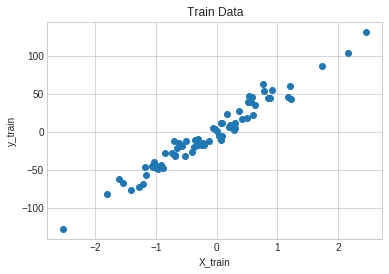

In [99]:
plt.scatter(X_train, y_train)
plt.title("Train Data")
plt.xlabel("X_train")
plt.ylabel("y_train")

Text(0,0.5,'y_test')

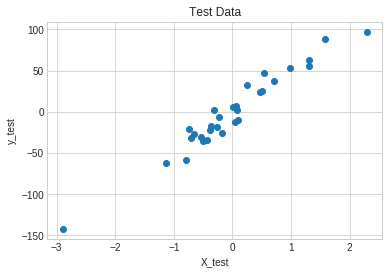

In [100]:
plt.scatter(X_test, y_test)
plt.title("Test Data")
plt.xlabel("X_test")
plt.ylabel("y_test")

In [109]:
rr = ridge_regression()
rr.fit(X_train, y_train)

Text(0,0.5,'y_test')

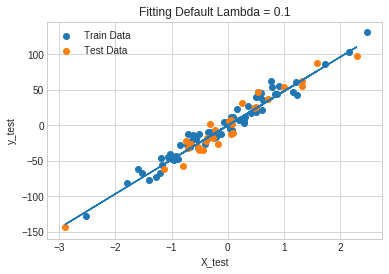

In [110]:
plt.scatter(X_train, y_train, label="Train Data")
plt.scatter(X_test, y_test, label="Test Data")
plt.plot(X_test, rr.predict(X_test))
plt.title("Fitting Default Lambda = 0.1")
plt.legend(loc="upper left")
plt.xlabel("X_test")
plt.ylabel("y_test")

Text(0,0.5,'y_test')

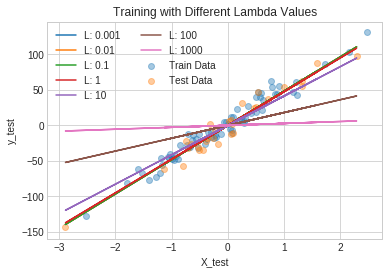

In [111]:
plt.scatter(X_train, y_train, alpha=0.4, label="Train Data")
plt.scatter(X_test, y_test, alpha=0.4, label="Test Data")

for l in lambda_values:
    rr.fit(X_train, y_train, l)
    plt.plot(X_test, rr.predict(X_test), label=f"L: {l}")
    
plt.legend(loc="upper left", ncol=2)
plt.title("Training with Different Lambda Values")
plt.xlabel("X_test")
plt.ylabel("y_test")

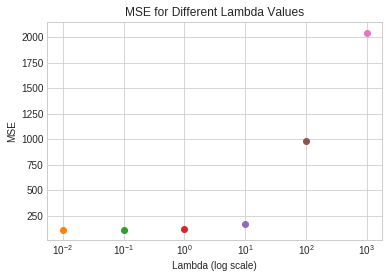

In [120]:
import sklearn

fig = plt.figure()
ax = plt.gca()


for l in lambda_values:
    rr.fit(X_train, y_train, l)
    ax.scatter(l, sklearn.metrics.mean_squared_error(y_test, rr.predict(X_test)))
    
plt.title("MSE for Different Lambda Values")
plt.xlabel("Lambda (log scale)")
plt.ylabel("MSE")

ax.set_xscale("log")

## 3.3c (0.25 point)
We create a sample regression dataset using scikit-learn make_regression  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression   
The dataset has 100 training samples and in this exercise we will plot the weights of the model against different values of $\lambda$ = [0.001, 0.01, 0.1, 1, 10, 100, 1000]. For this exercise we take the training samples $x_i \in \mathbb{R}^{10}$ i.e. d = 10. Since the bias term is absorbed in the parameter $w = \begin{bmatrix}w_1 & w_2 & ... & w_d & b \end{bmatrix}^T$ the dimension of $w$ is $d+1$. Therefore we will only consider the first $d$ values (d=10) of self.w  
  
Train the ridge regression model on the training set (X_train, y_train) for different values of $\lambda$.
Plot a graph with **log scaled** lambda values on X-axis and each $w_i$ on the Y-axis on the same plot. Explain what happens to the weight values and model capacity as you increase the regularization coefficient.

In [5]:
from sklearn.model_selection import train_test_split
X_train , y_train = make_regression(n_samples = 100, n_features = 10, noise = 10)
print(X_train.shape, y_train.shape)

(100, 10) (100,)


In [112]:
rr = ridge_regression()

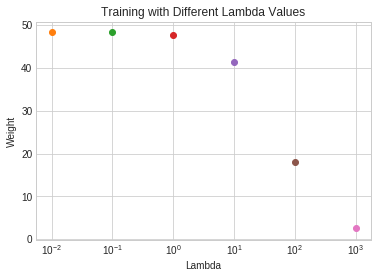

In [118]:
fig = plt.figure()
ax = plt.gca()


for l in lambda_values:
    rr.fit(X_train, y_train, l)
    ax.scatter(l, rr.w)
    
# plt.legend(loc="upper left", ncol=2)
plt.title("Training with Different Lambda Values")
plt.xlabel("Lambda")
plt.ylabel("Weight")
ax.set_xscale("log")

#### Q: Explain what happens to the weight values and model capacity as you increase the regularization coefficient.
A: As the lambda value increases, weights have smaller value to balance it. Lambda is an hyperparameter that needs to be finetuned. In this case, we can see (in previous plot) that lambda > 10 can't generalize well. But the model capacity stays same since there is no change in the number of parameters.

## 3.3d (0.25 point)
Answer the following questions  
1. Do you observe overfitting or underfitting for different values of λ in this exercise?

Solution: I don't see any overfitting because model capacity is suitable for given dataset. But I see underfitting in the case where lambda >= 100.